# Modeling

In [233]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler,StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [234]:
df_model = pd.read_csv('./Data/clean_data.csv', index_col=0)
df_model.head()

,amount_tsh,date_recorded,gps_height,basin,region,local_government_area,population,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity,source_type,waterpoint_type,status_group,construction_decade
0,6000.0,2011-03-14,1390,Lake Nyasa,Iringa,Ludewa,109,False,1999,gravity,user-group,annually,soft,enough,spring,communal standpipe,functional,1990s (1990-1999)
1,0.0,2013-03-06,1399,Lake Victoria,Mara,Serengeti,280,True,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,2000s (2000-2009)
2,25.0,2013-02-25,686,Pangani,Manyara,Simanjiro,250,True,2009,gravity,user-group,per bucket,soft,enough,dam,communal standpipe multiple,functional,2000s (2000-2009)
3,0.0,2013-01-28,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,True,1986,submersible,user-group,never pay,soft,dry,borehole,communal standpipe multiple,non functional,1980s (1980-1989)
4,0.0,2011-07-13,0,Lake Victoria,Kagera,Karagwe,0,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,Unknown


In [235]:
categorical_cols = ['region', 'extraction_type_class', 'management_group', 'quantity', 'water_quality' , 'waterpoint_type', 'source_type', 'status_group' ]

In [236]:
# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode the categorical columns in the DataFrame
for col in categorical_cols:
    df_model[col] = encoder.fit_transform(df_model[col])

# covert categorical columns to objects
for col in categorical_cols:
    df_model[col] = df_model[col].astype(object)
# convert permit to object
df_model['permit'] = df_model['permit'].astype(object)

In [237]:
df_model.head()

,amount_tsh,date_recorded,gps_height,basin,region,local_government_area,population,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity,source_type,waterpoint_type,status_group,construction_decade
0,6000.0,2011-03-14,1390,Lake Nyasa,3,Ludewa,109,False,1999,0,4,annually,6,1,6,1,0,1990s (1990-1999)
1,0.0,2013-03-06,1399,Lake Victoria,9,Serengeti,280,True,2010,0,4,never pay,6,2,3,1,0,2000s (2000-2009)
2,25.0,2013-02-25,686,Pangani,8,Simanjiro,250,True,2009,0,4,per bucket,6,1,1,2,0,2000s (2000-2009)
3,0.0,2013-01-28,263,Ruvuma / Southern Coast,12,Nanyumbu,58,True,1986,5,4,never pay,6,0,0,2,1,1980s (1980-1989)
4,0.0,2011-07-13,0,Lake Victoria,4,Karagwe,0,True,0,0,1,never pay,6,3,3,1,0,Unknown


In [238]:
df_model.drop(['date_recorded', 'construction_year', 'basin', 'local_government_area', 
                             'amount_tsh', 'payment_type', 'permit', 'gps_height', 'construction_decade'], axis=1, inplace=True)

In [239]:
# split the dataset
X = df_model.drop('status_group', axis=1)
y = df_model['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [240]:

y_train = y_train.astype('int')
y_test = y_test.astype('int')

### Dummy Classifier

In [258]:
# Build a pipeline with a StandardScaler and a DummyClassifier
dummy_pipe = Pipeline([('scaler', StandardScaler()), 
                ('dummy', DummyClassifier(random_state=42))])
# fit the pipeline to the training set
dummy_pipe.fit(X_train, y_train)
# make predictions on the test set
y_pred_dummy = dummy_pipe.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred_dummy)
precision = precision_score(y_test, y_pred_dummy)
recall = recall_score(y_test, y_pred_dummy)
f1 = f1_score(y_test, y_pred_dummy)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dummy))

Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.70      7534
           1       0.00      0.00      0.00      6552

    accuracy                           0.53     14086
   macro avg       0.27      0.50      0.35     14086
weighted avg       0.29      0.53      0.37     14086



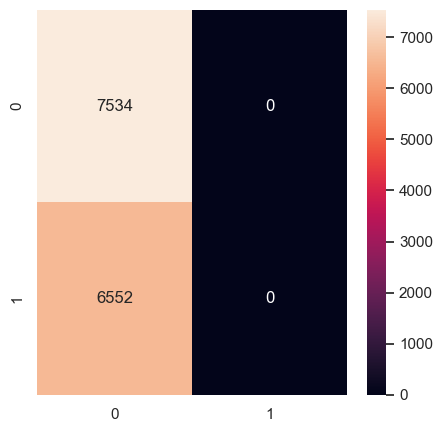

In [259]:
# plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dummy), annot=True, fmt='g');

- The precision for class 0 is 0.53, which means that when the dummy classifier predicts an instance as class 0, it is correct around 53% of the time. The recall for class 0 is 1.00, indicating that the classifier is able to identify all instances of class 0 correctly. The f1-score for class 0 is 0.70, which is a weighted average of precision and recall and provides a balance between the two.

- However, for class 1, the precision is 0.00, meaning that when the dummy classifier predicts an instance as class 1, it is never correct. The recall for class 1 is also 0.00, indicating that the classifier fails to identify any instances of class 1 correctly. Consequently, the f1-score for class 1 is 0.00, indicating poor performance.

- In terms of accuracy, the dummy classifier achieves an accuracy of 0.53, meaning that it correctly predicts the class for around 53% of the instances.

- Overall, these results indicate that the dummy classifier performs poorly in predicting class 1, as it never correctly identifies any instances of that class. It performs better in predicting class 0, achieving a reasonable precision and recall.

### Decision Tree

In [242]:
# Create a pipeline with a decision tree classifier as the estimator:
dt = Pipeline([('scaler', StandardScaler()),
                  ('tree', DecisionTreeClassifier(random_state=42))])
# fit the pipeline to the training set
dt.fit(X_train, y_train)
# make predictions on the test set
y_pred_dt = dt.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      7534
           1       0.79      0.64      0.71      6552

    accuracy                           0.76     14086
   macro avg       0.76      0.75      0.75     14086
weighted avg       0.76      0.76      0.75     14086



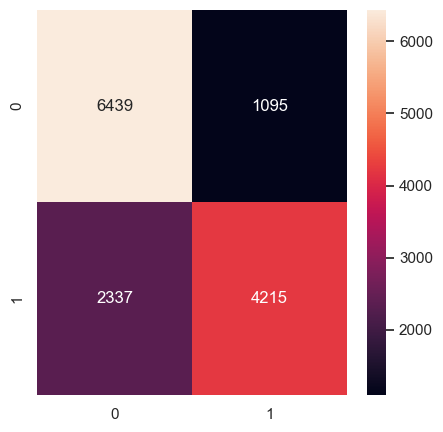

In [243]:
# plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='g');


- Accuracy: The accuracy score represents the proportion of correctly predicted instances out of the total number of instances. In this case, the decision tree model achieved an accuracy of around 0.76, indicating that it predicted 76% of instances correctly.

- Precision: Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. A precision score of 0.79 means that when the model predicts a positive class, it is correct approximately 79% of the time.

- Recall: Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total number of actual positive instances. The recall score of 0.64 suggests that the model identified around 64% of the positive instances correctly.

- F1 Score: The F1 score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. The F1 score of 0.71 indicates a reasonably good balance between precision and recall.

These scores suggest that the decision tree model performs better than the dummy classifier in terms of accuracy, precision, recall, and F1 score.

### Random Forest

In [251]:
# Create a pipeline with a StandardScaler and a RandomForestClassifier.
rf = Pipeline([('scaler', StandardScaler()),
                  ('rf', RandomForestClassifier(random_state=42))])
# fit the pipeline to the training data
rf.fit(X_train, y_train);
# make predictions on the test data
y_pred_rf = rf.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      7534
           1       0.79      0.67      0.72      6552

    accuracy                           0.76     14086
   macro avg       0.77      0.76      0.76     14086
weighted avg       0.76      0.76      0.76     14086



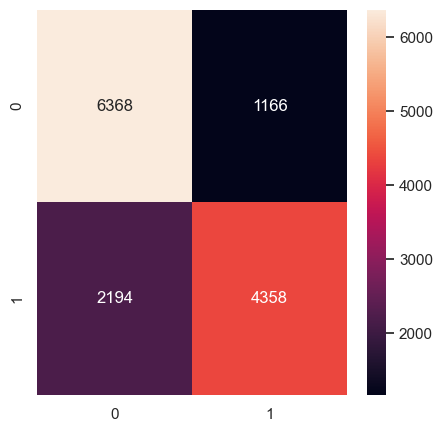

In [253]:
# plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='g');

- Precision: The precision for class 0 is 0.74, indicating that out of all instances predicted as class 0, approximately 74% are actually class 0. The precision for class 1 is 0.79, meaning that out of all instances predicted as class 1, around 79% are actually class 1.

- Recall: The recall for class 0 is 0.85, indicating that the model correctly identifies approximately 85% of the instances belonging to class 0. The recall for class 1 is 0.67, meaning that the model correctly identifies around 67% of the instances belonging to class 1.

- F1-score: The F1-score combines precision and recall into a single metric. The F1-score for class 0 is 0.79, and for class 1, it is 0.72. The F1-score provides a balanced measure of the model's performance, considering both precision and recall.

- Accuracy: The overall accuracy of the model is 0.76, indicating that it correctly predicts approximately 76% of the instances.

### Support Vector Machine (SVM) classifier

In [256]:
# Create a pipeline with an SVM classifier as the estimator
svm_clf  = Pipeline([('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42))
])

# Fit the pipeline on the training data
svm_clf.fit(X_train, y_train)

# Make predictions on the test data using the trained pipeline
y_pred_svm = svm_clf.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78      7534
           1       0.83      0.52      0.64      6552

    accuracy                           0.73     14086
   macro avg       0.76      0.71      0.71     14086
weighted avg       0.75      0.73      0.72     14086



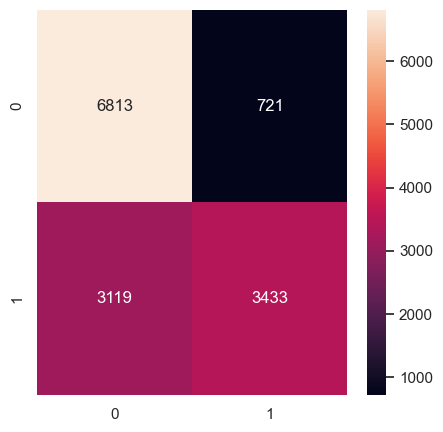

In [257]:
# plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='g');

- Precision: The precision for class 0 is 0.69, indicating that out of all instances predicted as class 0, approximately 69% are actually class 0. The precision for class 1 is 0.83, meaning that out of all instances predicted as class 1, around 83% are actually class 1.

- Recall: The recall for class 0 is 0.90, indicating that the model correctly identifies approximately 90% of the instances belonging to class 0. The recall for class 1 is 0.52, meaning that the model correctly identifies around 52% of the instances belonging to class 1.

- F1-score: The F1-score combines precision and recall into a single metric. The F1-score for class 0 is 0.78, and for class 1, it is 0.64. The F1-score provides a balanced measure of the model's performance, considering both precision and recall.

- Accuracy: The overall accuracy of the model is 0.73, indicating that it correctly predicts approximately 73% of the instances.

### Decision Tree with GridsearchCV

In [244]:
dt = Pipeline([('scaler', StandardScaler()),
                  ('tree', DecisionTreeClassifier(random_state=42))])
# create a grid of parameters to test

param_grid = [{'tree__max_depth': [16, 18, 20],
              'tree__min_samples_split': [4, 6, 8],
              'tree__min_samples_leaf': [2, 3, 4],
              'tree__criterion': ['gini', 'entropy']}]

# create grid with estimators
gridsearch = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1, verbose=1)

# fit the grid with the data    
gridsearch.fit(X_train, y_train);

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [245]:
gridsearch.score(X_train, y_train)

0.7962752614889489

In [246]:
gridsearch.score(X_test, y_test)

0.7611103223058355

In [247]:
gridsearch.best_estimator_ 

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=18,
                                        min_samples_leaf=4, min_samples_split=4,
                                        random_state=42))])